# Regressão Logística
***

## Importando bibliotecas

In [118]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [119]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv')

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [120]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Separando o conjunto de dados**

In [121]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

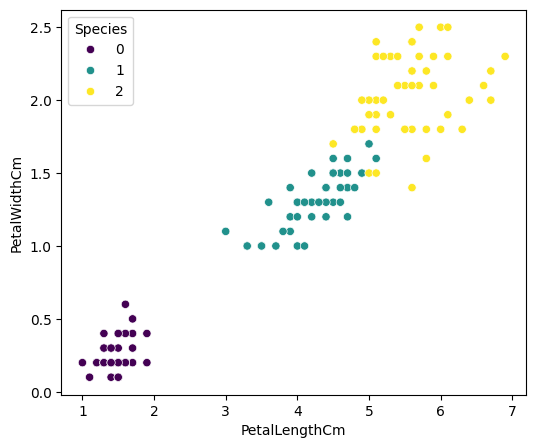

In [122]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dataset.iloc[:, 4].squeeze(), palette='viridis')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

## Treinamento do modelo 

In [123]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Região de decisão

In [124]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

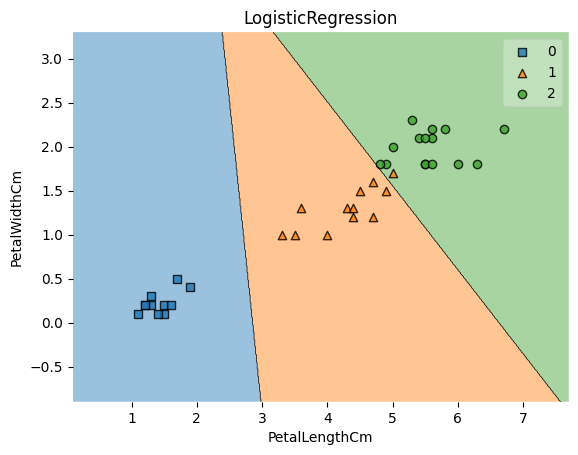

In [125]:
show_decision_region(X_test, y_test, model)

## E se ajustarmos os parâmetros

In [126]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

param_grid = {
    #algoritmos usados para otimizar a função de custo
    'solver': ['lbfgs', 'liblinear', 'saga'],

    # tipo de regularização:
    #L1: Penaliza a soma dos valores absolutos | L2: Penaliza a soma dos quadrados
    'penalty': ['l1','l2', None],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score:  0.9648221343873518
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Agora vamos utilizar o modelo treinando apenas com as features das sépalas

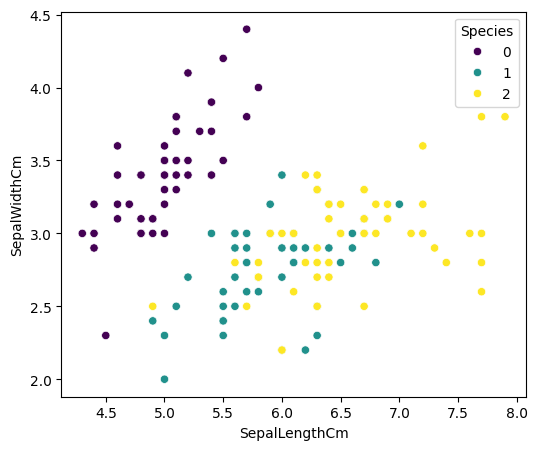

In [127]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dataset.iloc[:, 4].squeeze(), palette='viridis')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [128]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.92      0.88        12
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



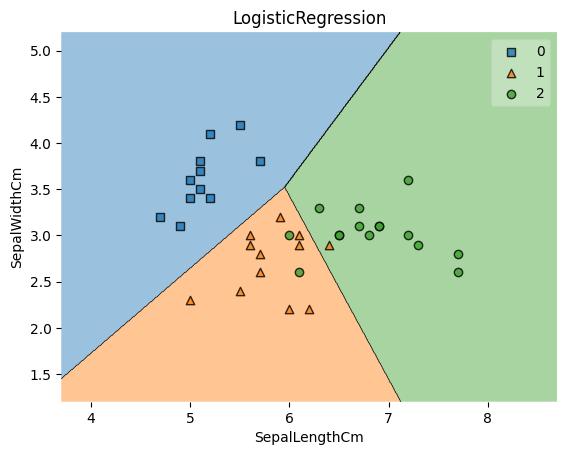

In [129]:
show_decision_region(X_test, y_test, model)

In [130]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l1','l2', None],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_iter': 100, 'penalty': None, 'solver': 'saga'}
Best cross-validation score:  0.7584980237154151
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      0.83      0.80        12
           2       0.86      0.80      0.83        15

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38

